In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("D:\DownLoad\projects\Multi_claasification_model\data\phase2_students.csv")
df=pd.DataFrame(data)


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_11776\3776744855.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DownLoad\projects\Multi_claasification_model\data\phase2_students.csv")


In [3]:
# checking for missing values 
df.isna().sum()

flow_time           0
header_size         0
packet_duration     0
overall_rate        0
src_rate            0
dst_rate            0
fin_packets         0
urg_packets         0
rst_packets         0
max_value           0
value_covariance    0
fin_flags           0
syn_flags           0
rst_flags           0
psh_flags           0
ack_flags           0
protocol_http       0
protocol_https      0
protocol_tcp        0
protocol_udp        0
protocol_icmp       0
label               0
dtype: int64

their are no missing values

In [4]:
df.shape

(938583, 22)

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(842396, 22)

Droping Duplicates

In [7]:
df.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,8.423960e+05,8.423960e+05,842396.000000,8.423960e+05,8.423960e+05,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000,...,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000,842396.000000
mean,1.495807e+01,1.134347e+05,84.506737,6.354150e+03,6.354150e+03,0.000002,0.090096,6.504553,41.363621,190.156248,...,0.076325,0.218628,0.080831,0.084178,0.121038,0.048411,0.057412,0.573210,0.234530,0.139007
std,6.225728e+03,1.901094e+06,174.854336,6.645237e+04,6.645237e+04,0.000948,0.286824,74.615481,342.390977,541.689156,...,0.265518,0.413316,0.272576,0.277654,0.326172,0.214633,0.232629,0.494612,0.423705,0.345954
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.227209e+00,2.227209e+00,0.000000,0.000000,0.000000,0.000000,50.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170050e-04,5.520000e+01,64.000000,1.698691e+01,1.698691e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.402502e-01,5.036347e+03,64.000000,1.872610e+02,1.872610e+02,0.000000,0.000000,0.000000,0.010000,56.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
for col in df.select_dtypes(include=["float64","int64"]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [9]:
df.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,842396.000000,842396.000000,842396.0,842396.000000,842396.000000,842396.0,842396.0,842396.0,842396.000000,842396.000000,...,842396.0,842396.0,842396.0,842396.0,842396.0,842396.0,842396.0,842396.000000,842396.0,842396.0
mean,0.091743,3124.669215,64.0,127.069186,127.069186,0.0,0.0,0.0,0.006414,54.573963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.573210,0.0,0.0
std,0.138404,5240.454903,0.0,190.699414,190.699414,0.0,0.0,0.0,0.010655,6.692679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494612,0.0,0.0
min,0.000000,0.000000,64.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,42.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,0.000000,54.000000,64.0,2.227209,2.227209,0.0,0.0,0.0,0.000000,50.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,0.000317,55.200000,64.0,16.986914,16.986914,0.0,0.0,0.0,0.000000,54.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
75%,0.140250,5036.347500,64.0,187.261003,187.261003,0.0,0.0,0.0,0.010000,56.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
max,0.350626,12509.868750,64.0,464.811693,464.811693,0.0,0.0,0.0,0.025000,65.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [11]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842396 entries, 0 to 938582
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flow_time         842396 non-null  float64
 1   header_size       842396 non-null  float64
 2   packet_duration   842396 non-null  float64
 3   overall_rate      842396 non-null  float64
 4   src_rate          842396 non-null  float64
 5   dst_rate          842396 non-null  float64
 6   fin_packets       842396 non-null  float64
 7   urg_packets       842396 non-null  float64
 8   rst_packets       842396 non-null  float64
 9   max_value         842396 non-null  float64
 10  value_covariance  842396 non-null  float64
 11  fin_flags         842396 non-null  int64  
 12  syn_flags         842396 non-null  int64  
 13  rst_flags         842396 non-null  int64  
 14  psh_flags         842396 non-null  int64  
 15  ack_flags         842396 non-null  int64  
 16  protocol_http     842396 

In [12]:
df.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,12509.86875,64.0,464.811693,464.811693,0.0,0.0,0.0,0.000,50.00,...,0,0,0,0,0,0,0,0,0,1
1,0.018393,3702.54000,64.0,464.811693,464.811693,0.0,0.0,0.0,0.010,54.28,...,0,0,0,0,0,0,0,0,0,1
2,0.000000,182.00000,64.0,38.559448,38.559448,0.0,0.0,0.0,0.000,65.10,...,0,0,0,0,0,0,0,0,0,2
3,0.109292,12509.86875,64.0,464.811693,464.811693,0.0,0.0,0.0,0.025,65.10,...,0,0,0,0,0,0,0,0,0,2
4,0.000000,162.00000,64.0,2.305494,2.305494,0.0,0.0,0.0,0.000,65.10,...,0,0,0,0,0,0,0,0,0,2


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

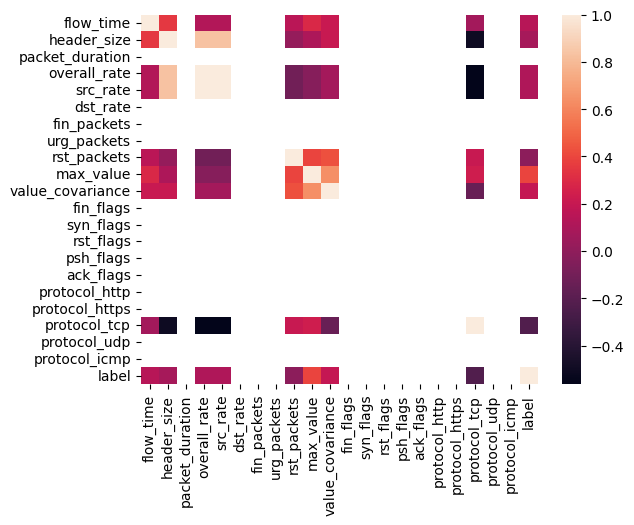

In [14]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)
plt.Figure(figsize=(10,6))
plt.show()


In [15]:
X=df.drop(columns="label")
Y=df['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
sm=SMOTE(random_state=42)
X_train_resample,Y_train_resample=sm.fit_resample(X_train,Y_train)


In [18]:
scale=RobustScaler()
X_train_scaled=scale.fit_transform(X_train_resample)
X_test_scaled=scale.transform(X_test)

In [17]:
df.shape

(842396, 22)

In [19]:
# Train RandomForest on SMOTE-applied, scaled data
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_scaled, Y_train_resample)



RandomForestClassifier(random_state=42)

In [20]:
importances = rt.feature_importances_
feature_names = X.columns  # or use X_train.columns if it's a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [21]:
top_k = 11 # or choose based on cumulative importance
selected_features = feature_importance_df['Feature'].head(top_k).tolist()

In [22]:
X_train_selected = X_train_scaled[:, [list(feature_names).index(f) for f in selected_features]]
X_test_selected = X_test_scaled[:, [list(feature_names).index(f) for f in selected_features]]

In [23]:
print(selected_features)

['src_rate', 'overall_rate', 'header_size', 'max_value', 'flow_time', 'rst_packets', 'protocol_tcp', 'value_covariance', 'packet_duration', 'urg_packets', 'fin_packets']


begining Feature selection using the Random forest most feature  https://www.geeksforgeeks.org/feature-selection-using-random-forest/

In [24]:
Rt=RandomForestClassifier()
Rt.fit(X_train_selected,Y_train_resample)
ypred=Rt.predict(X_test_selected)



In [28]:
import joblib

# Save to a specific path (make sure the folder exists)
joblib.dump(Rt, 'D:\DownLoad\projects\Multi_claasification_model\\final_approach\saved_models\RandomForest.joblib')


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_21516\1534848779.py:4: SyntaxWarning: invalid escape sequence '\D'
  joblib.dump(Rt, 'D:\DownLoad\projects\Multi_claasification_model\\final_approach\saved_models\RandomForest.joblib')


['D:\\DownLoad\\projects\\Multi_claasification_model\\final_approach\\saved_models\\RandomForest.joblib']

In [ ]:
# import joblib

# # Save the trained RandomForest model to a file
# joblib.dump(Rt, 'random_forest_model.joblib')



In [25]:
from sklearn.metrics  import  accuracy_score ,recall_score ,f1_score ,precision_score

In [26]:
print(accuracy_score(Y_test, ypred))
print(precision_score(Y_test, ypred, average='macro'))
print(recall_score(Y_test, ypred, average='macro'))
print(f1_score(Y_test, ypred, average='macro'))

0.7658416429249763
0.5635993738914996
0.6713029689965974
0.5911750921424642


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logreg.fit(X_train_selected, Y_train_resample)

y_pred_logreg = logreg.predict(X_test_selected)
print(classification_report(Y_test, y_pred_logreg))

d:\DownLoad\projects\Multi_claasification_model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.85      0.77      4279
           1       0.89      0.62      0.73    119718
           2       0.30      0.46      0.36     31675
           3       0.27      0.59      0.37      1269
           4       0.53      0.90      0.67     10317
           5       0.05      0.45      0.09      1222

    accuracy                           0.61    168480
   macro avg       0.46      0.65      0.50    168480
weighted avg       0.74      0.61      0.65    168480



In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax', num_class=None, random_state=42)
xgb.fit(X_train_selected, Y_train_resample)

ypred_xgb = xgb.predict(X_test_selected)
print(classification_report(Y_test, ypred_xgb))


              precision    recall  f1-score   support

           0       0.76      0.81      0.78      4279
           1       0.91      0.87      0.89    119718
           2       0.65      0.66      0.65     31675
           3       0.39      0.61      0.48      1269
           4       0.74      0.96      0.84     10317
           5       0.29      0.66      0.40      1222

    accuracy                           0.83    168480
   macro avg       0.62      0.76      0.67    168480
weighted avg       0.84      0.83      0.83    168480



In [ ]:
print(accuracy_score(Y_test, ypred_xgb))
print(precision_score(Y_test, ypred_xgb, average='macro'))
print(recall_score(Y_test, ypred_xgb, average='macro'))
print(f1_score(Y_test, ypred_xgb, average='macro'))

In [29]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(objective='multiclass', num_class=6, random_state=42)
lgb.fit(X_train_selected, Y_train_resample)

ypred_lgb = lgb.predict(X_test_scaled)
print(classification_report(Y_test, ypred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1787
[LightGBM] [Info] Number of data points in the train set: 2869074, number of used features: 8
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759


d:\DownLoad\projects\Multi_claasification_model\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 21 features, but LGBMClassifier is expecting 11 features as input.

In [ ]:
print(accuracy_score(Y_test, ypred_lgb))
print(precision_score(Y_test, ypred_lgb, average='macro'))
print(recall_score(Y_test, ypred_lgb, average='macro'))
print(f1_score(Y_test, ypred_lgb, average='macro'))